In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data.csv', delimiter=';', encoding='utf-8') 
df.head()

,ID,City,District,Property_Type,Price,Size_sqm,Rooms,Year_Built,Elevator,Balcony,Garden
0,1,Prague,District 1,Apartment,2500000,40,1,1990,True,True,True
1,2,Prague,District 2,Apartment,2550000,45,2,1991,False,False,False
2,3,Prague,District 3,Apartment,2600000,50,3,1992,True,False,False
3,4,Prague,District 4,Apartment,2650000,55,4,1993,False,True,False
4,5,Prague,District 5,Apartment,2700000,60,1,1994,True,False,False


In [3]:
df.isnull().any()

ID               False
City             False
District         False
Property_Type    False
Price            False
Size_sqm         False
Rooms            False
Year_Built       False
Elevator         False
Balcony          False
Garden           False
dtype: bool

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             100 non-null    int64 
 1   City           100 non-null    object
 2   District       100 non-null    object
 3   Property_Type  100 non-null    object
 4   Price          100 non-null    int64 
 5   Size_sqm       100 non-null    int64 
 6   Rooms          100 non-null    int64 
 7   Year_Built     100 non-null    int64 
 8   Elevator       100 non-null    bool  
 9   Balcony        100 non-null    bool  
 10  Garden         100 non-null    bool  
dtypes: bool(3), int64(5), object(3)
memory usage: 6.7+ KB


In [6]:
df.describe()

,ID,Price,Size_sqm,Rooms,Year_Built
count,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,4.975000e+06,62.500000,2.500000,2003.500000
std,29.011492,1.450575e+06,14.433757,1.123666,8.833476
min,1.000000,2.500000e+06,40.000000,1.000000,1990.000000
25%,25.750000,3.737500e+06,50.000000,1.750000,1996.000000
50%,50.500000,4.975000e+06,62.500000,2.500000,2003.000000
75%,75.250000,6.212500e+06,75.000000,3.250000,2011.000000
max,100.000000,7.450000e+06,85.000000,4.000000,2019.000000


In [7]:
df.shape

(100, 11)

In [8]:
df['Price'].max()

7450000

In [9]:
df['Price'].min()

2500000

In [10]:
df['Rooms'].mean()

2.5

PRŮMĚRNÁ CENA ZA METR ČTVEREČNÍ V JEDNOTLIVÝCH MĚSTECH A MĚSTSKÝCH ČÁSTECH

In [12]:
df['Price_per_sqm'] = df['Price'] / df['Size_sqm']

In [13]:
prum_cena_mesto = df.groupby('City')['Price_per_sqm'].mean()
print('Průměrná cena podle města', prum_cena_mesto)

prum_cena_casti = df.groupby(['City', 'District'])['Price_per_sqm'].mean()
print('Průměrná cena podle mětské části: ' , prum_cena_casti)

Průměrná cena podle města City
Brno        96362.928738
Ostrava    117530.313233
Prague      62495.113547
Name: Price_per_sqm, dtype: float64
Průměrná cena podle mětské části:  City     District   
Brno     District 1     137500.000000
         District 10     70000.000000
         District 2     123333.333333
         District 3     112000.000000
         District 4     102727.272727
         District 5      95000.000000
         District 6      88461.538462
         District 7      82857.142857
         District 8      78000.000000
         District 9      73750.000000
Ostrava  District 1     168750.000000
         District 10     84705.882353
         District 2     151111.111111
         District 3     137000.000000
         District 4     125454.545455
         District 5     115833.333333
         District 6     107692.307692
         District 7     100714.285714
         District 8      94666.666667
         District 9      89375.000000
Prague   District 1      87500.000000
    

NEJDRAŽŠÍ A NEJLEVNĚJŠÍ NEMOVITOSTI

In [15]:
grouped = df.groupby('ID')['Price'].sum().reset_index()
nejdrazsi = grouped.sort_values(by='Price', ascending=False).head(5)
nejdrazsi

,ID,Price
99,100,7450000
98,99,7400000
97,98,7350000
96,97,7300000
95,96,7250000


In [16]:
nejlevnejsi = grouped.sort_values(by='Price', ascending=True).head(5)
nejlevnejsi

,ID,Price
0,1,2500000
1,2,2550000
2,3,2600000
3,4,2650000
4,5,2700000


DISTRIBUCE VELIKOSTI BYTŮ

In [18]:
rozlozeni = df.groupby('Property_Type')['Size_sqm'].count().reset_index()
rozlozeni

,Property_Type,Size_sqm
0,Apartment,60
1,House,40


HISTOGRAM - ROZLOŽENÍ NEMOVITOSTI PODLE VELIKOSTI

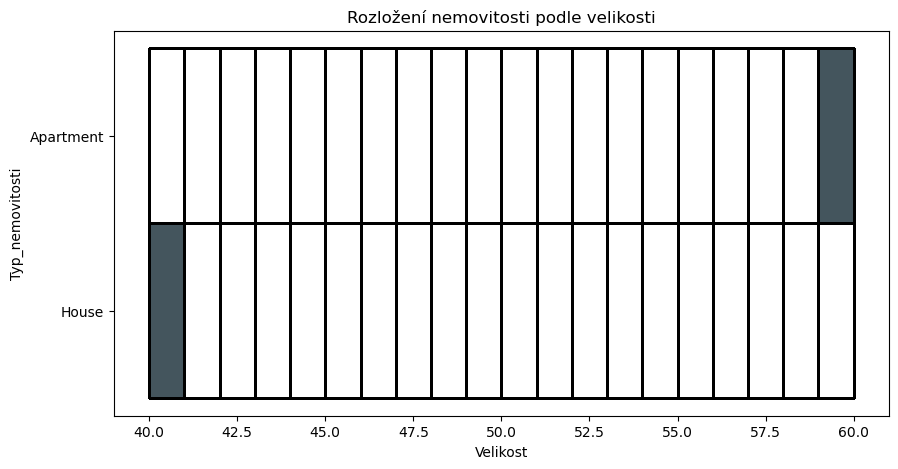

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x=rozlozeni['Size_sqm'], y=rozlozeni['Property_Type'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Rozložení nemovitosti podle velikosti')
plt.xlabel('Velikost')
plt.ylabel('Typ_nemovitosti')
plt.show()

VLIV BALKONU ČI ZAHRADY NA CENU

In [22]:
balkon_cena = df.groupby('Balcony')['Price_per_sqm'].mean()
zahrada_cena = df.groupby('Garden')['Price_per_sqm'].mean()
print("Průměrná cena za m² podle přítomnosti balkonu:\n", balkon_cena)
print("Průměrná cena za m² podle přítomnosti zahrady:\n", zahrada_cena)


Průměrná cena za m² podle přítomnosti balkonu:
 Balcony
False    83514.566984
True     83949.658329
Name: Price_per_sqm, dtype: float64
Průměrná cena za m² podle přítomnosti zahrady:
 Garden
False    80118.987936
True     97836.538462
Name: Price_per_sqm, dtype: float64


In [23]:
prumerna_cena = df.groupby('Property_Type').agg({'Price':'mean'}).reset_index()
prumerna_cena

,Property_Type,Price
0,Apartment,3975000.0
1,House,6475000.0


TREND MEZI ROKEM VÝSTAVBY A CENOU ZA METR ČVEREČNÍ

Vztah mezi rokem výstavby a cenou za m2:
                Year_Built  Price_per_sqm
Year_Built       1.000000      -0.140269
Price_per_sqm   -0.140269       1.000000


<Figure size 800x500 with 0 Axes>

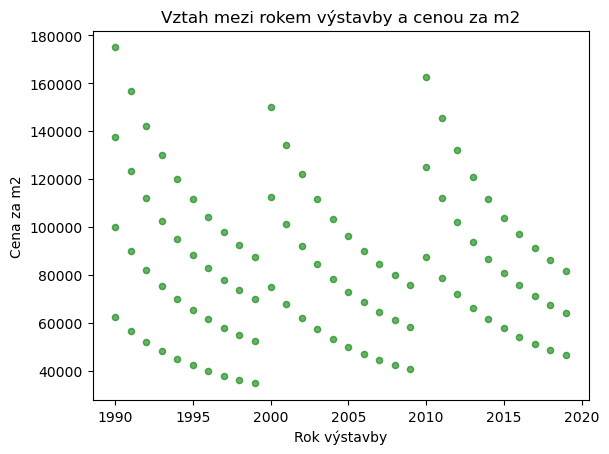

In [25]:
vztah = df[['Year_Built', 'Price_per_sqm']].corr()
print('Vztah mezi rokem výstavby a cenou za m2:\n', vztah)

plt.figure(figsize=(8,5))
df.plot.scatter(x='Year_Built', y='Price_per_sqm', alpha=0.6, color='green')
plt.title('Vztah mezi rokem výstavby a cenou za m2')
plt.xlabel('Rok výstavby')
plt.ylabel('Cena za m2')
plt.show()

PREDIKCE CENY

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
X = df[['Rooms']]
y= df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE) : {mse:.2f}")


Mean Absolute Error (MAE) : 1292318.27
Mean Squared Error (MSE) : 2092854499172.07


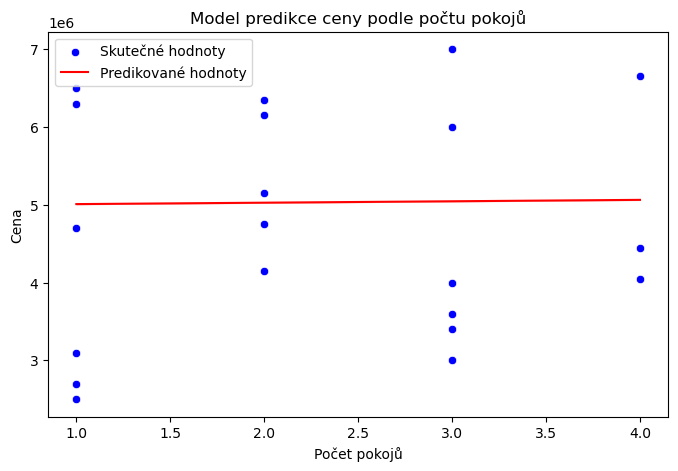

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = X_test['Rooms'], y=y_test, color='blue', label='Skutečné hodnoty')
sns.lineplot(x = X_test['Rooms'], y = y_pred, color='red', label='Predikované hodnoty')
plt.xlabel('Počet pokojů')
plt.ylabel('Cena')
plt.title('Model predikce ceny podle počtu pokojů')
plt.legend()
plt.show()

VZTAH MEZI CENOU A VELIKOSTÍ NEMOVITOSTI

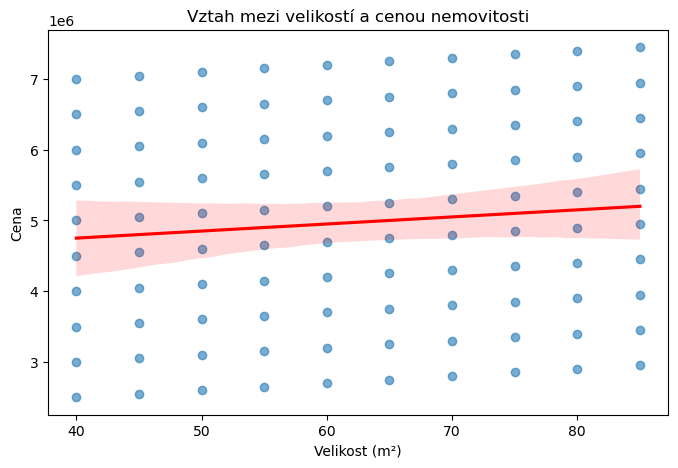

In [33]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Size_sqm'], y=df['Price'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Vztah mezi velikostí a cenou nemovitosti')
plt.xlabel('Velikost (m²)')
plt.ylabel('Cena')
plt.show()


In [34]:
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df['Year'] = pd.to_datetime(df['Year']).dt.year

PREDIKCE BUDOUCÍCH CEN

C:\Users\42072\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


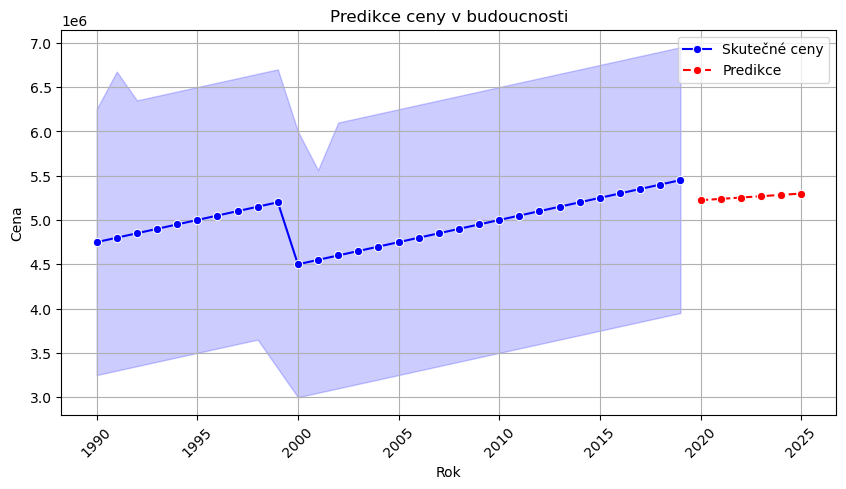

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


df['Year'] = df['Year_Built']  


X = df[['Year']]
y = df['Price']


model = LinearRegression()
model.fit(X, y)


future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 7).reshape(-1, 1)
future_prices = model.predict(future_years)


df_pred = pd.DataFrame({'Year': future_years.flatten(), 'Price': future_prices})
df_pred.set_index('Year', inplace=True)


plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Price', marker='o', color='blue', label='Skutečné ceny')
sns.lineplot(data=df_pred, x=df_pred.index, y='Price', marker='o', color='red', linestyle='dashed', label='Predikce')
plt.xlabel('Rok')
plt.ylabel('Cena')
plt.title('Predikce ceny v budoucnosti')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
